# Simulating Random Walks

Suppose a drunkard is standing at the origin in $\mathbb{R}$. At each time step, he goes 1 unit to the left with probability $p = 0.5$ or 1 unit to the right with probability $1-p = 0.5$. Let the length of his walk (number of time steps) be denoted by $M$, where $M \leq 100$. An example simulation of the drunkards's walk is `[1,0,1,2,1,0,-1,-2,...,-3]`.Let's make a numpy array of shape `(1000,100)` and fill it with simulated random walks each consisting of 100 time steps. Please see [here](https://github.com/petermchale/math9/blob/master/lectures/Lecture20.pdf) for more background details. 


In [1]:
import numpy as np
import random

random.seed(42)

def get_step():
    return -1 if random.random() < 0.5 else 1
    # could have used random.choice([-1,1])

max_M = 300  # max length (# steps) of random walk
N = 1000  # number of walks

x = np.zeros([N,max_M+1]) # trajectories

# fill the array with simulated trajectoies
for i in range(N): # choose a particular trajectory
    for j in range(1,max_M+1): # construct the trajectory
        x[i,j] = x[i,j-1] + get_step()
    
print(x[:10])

[[  0.   1.   0. ...,  -2.  -3.  -2.]
 [  0.   1.   2. ...,  10.   9.  10.]
 [  0.  -1.   0. ...,  14.  15.  16.]
 ..., 
 [  0.   1.   2. ..., -10.  -9.  -8.]
 [  0.   1.   2. ...,   2.   1.   0.]
 [  0.  -1.   0. ...,   0.  -1.  -2.]]


# Do random walks return to the origin?

Consider an ensemble of random walks of length $M$. Let $r_M$ be the fraction of those walks where, *at any point during the walk*, the drunkard returned to the origin. For $M = 1,2,3,4,5,6,7,8,9,\dots,100$, compute $r_M$ and make a graph of $r_M$ as a function of $M$.

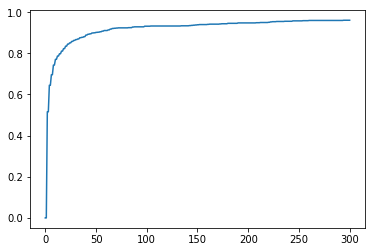

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

numbers_of_walks_that_went_back_to_0 = np.zeros(max_M+1)

def has_zero(xs):
    for x in xs:
        if x == 0:
            return True
    return False

for M in range(1,max_M+1): # consider walks of length M
    for i in range(N): # loop over all such walks
        if has_zero(x[i,1:M+1]): # be careful not to count x(t=0)
            numbers_of_walks_that_went_back_to_0[M] += 1

# to get the ratio r_M, 
# we need to divide by the number of simulations (N=1000)
plt.plot(numbers_of_walks_that_went_back_to_0 / float(N))

As you can see, it is very likely that a random walk of length 300 will, at some point, return to the origin.

There is a very cool theorem about this:

**Theorem** (Polya's recurrence theorem) An infinite random walk in 1-dimensional or 2-dimensional grid returns to the origin at some point with probability 1. 

# Distribution of walker positions

Let's plot many random walks:

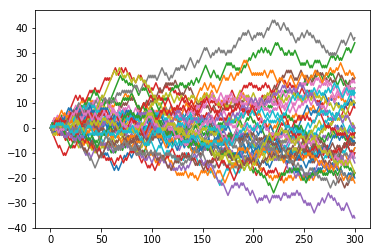

In [3]:
for i in range(40):
    plt.plot(range(max_M+1), x[i,:])

Suppose we choose a particular time point and ask where the drunkard is. We will get different answers for each trajectory. We call the  spectrum of answers we get the *distribution* of walker positions. Walker position is a discrete random variable so the distribution of positions is a probability mass function. 

Let's compute the distribution of walker positions at a sequence of different time points. First we need some machinery: 

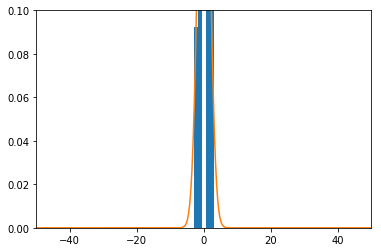

In [4]:
from math import sqrt, pi, e

def hist_and_fit(x_t, num_bins):
    x_pdf = np.linspace(-50,50,300)
    plt.axis([-50,50,0,0.1])
    _, _, _ = plt.hist(x_t, num_bins, normed=True)

    mu = np.mean(x_t)
    sigma = np.std(x_t)
    y_pdf = 1/(sqrt(2*pi)*sigma)*e**(-0.5*(x_pdf-mu)**2/sigma**2)
    plt.plot(x_pdf, y_pdf)

hist_and_fit(x[:, 3], 5)

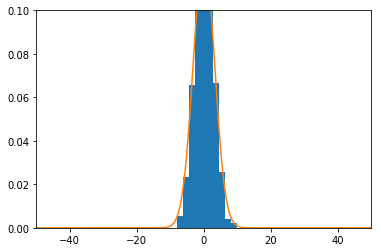

In [5]:
hist_and_fit(x[:, 10], 10)

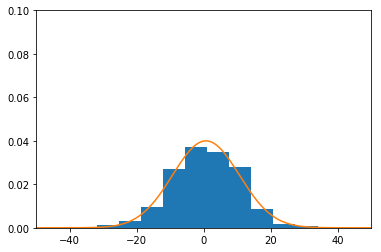

In [6]:
hist_and_fit(x[:, 100], 10)

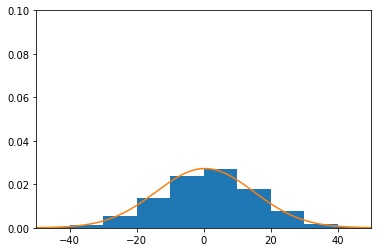

In [7]:
hist_and_fit(x[:, 200], 10)

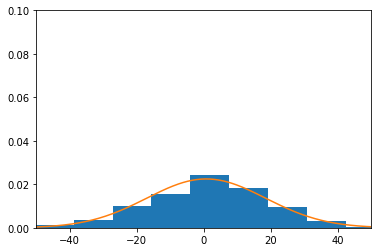

In [8]:
hist_and_fit(x[:, 300], 10)

# Empirical Observations from our simulations

Let's make some observations:

* The mean is always close to zero (makes sense?) 
* The histogram is looking more and more like a Gaussian
* The standard deviation is increasing (best fitting Gaussian is becoming wider)

Let's see how the standard deviation changes as we increase the length of the random walk:

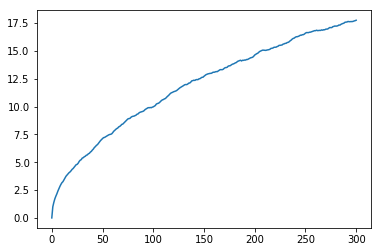

In [9]:
stdevs_of_random_walks = np.apply_along_axis(np.std, 0, x)
plt.plot(range(max_M+1), stdevs_of_random_walks)

Which function does it look like? Square root?

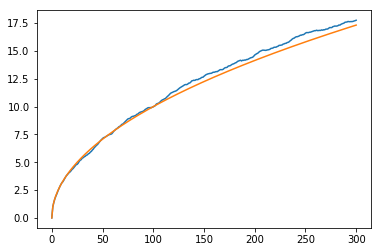

In [10]:
stdevs_of_random_walks = np.apply_along_axis(np.std, 0, x)
plt.plot(range(max_M+1), stdevs_of_random_walks)
plt.plot(range(max_M+1), np.sqrt(np.array(range(max_M+1))))

Wow perfect fit!!!

## Next time:

We will learn about the **Law of Large Numbers**, and the **Central Limit Theorem**, which explain the behaviors that we are seeing. 